In [1]:
# Importing key libraries 
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tools.eval_measures import rmse,mse
from statsmodels.tsa.api import SARIMAX
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [10]:
# Load dataset
df = pd.read_excel('AgeingIndex.xlsx',index_col='Rok',parse_dates=True)

In [11]:
#Check loaded dataframe
df.head()

,Index_Starnutia
Rok,
1996-01-01,51.22
1997-01-01,53.38
1998-01-01,55.39
1999-01-01,57.53
2000-01-01,59.78


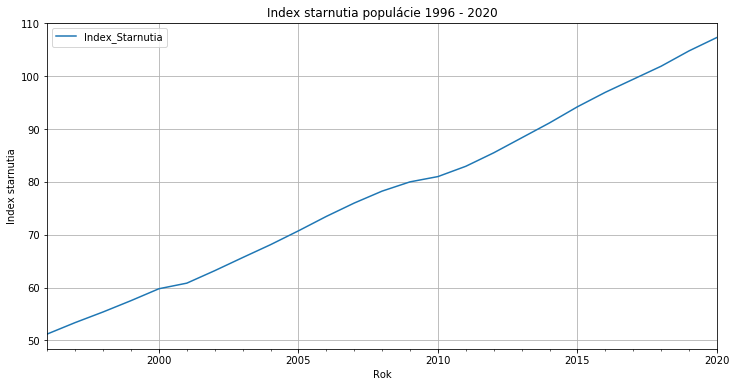

In [13]:
#Data Plot
title = 'Index starnutia populácie 1996 - 2020'
xlabel = 'Rok'
ylabel = 'Index starnutia'

ax = df.plot(figsize=(12,6),title=title, grid=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.autoscale(axis='x',tight=True)

In [99]:
#ACF calculation
acf(df['AgeingIndex'])

array([ 1.        ,  0.87799887,  0.75653135,  0.63768539,  0.52108051,
        0.40808718,  0.29589665,  0.19163328,  0.09569268,  0.00878589,
       -0.06875018, -0.13813656, -0.20368521, -0.26270776, -0.31440793,
       -0.35998853, -0.39423524, -0.41442653, -0.41927243, -0.40755044,
       -0.37798717, -0.33675256, -0.27908764, -0.20470926, -0.11169439])

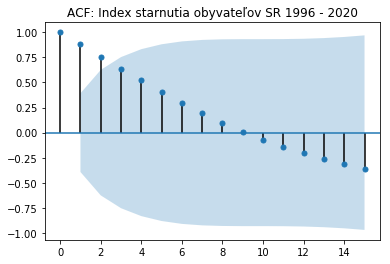

In [100]:
#ACF plot
title = 'ACF: Index starnutia obyvateľov SR 1996 - 2020'
lags = 15
plot_acf(df['AgeingIndex'],title=title,lags=lags);

In [101]:
#PACF calculation
pacf(df['AgeingIndex'])

array([ 1.        ,  0.91458216, -0.08648584, -0.08242682, -0.09559496,
       -0.09828674, -0.13630108, -0.09865883, -0.10967444, -0.11845842,
       -0.13400722, -0.17137816, -0.27270608, -0.34495881, -0.52864564,
       -1.18496577,  6.08855855,  0.86365223,  0.47036898,  0.33494135,
        0.2842668 ,  0.05579711,  0.15381841,  0.10368435,  0.16431601,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan])

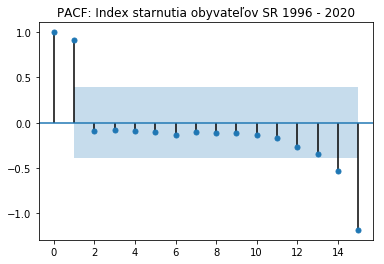

In [102]:
#PACF plot
title = 'PACF: Index starnutia obyvateľov SR 1996 - 2020'
lags = 15
plot_pacf(df['AgeingIndex'],title=title,lags=lags);

In [103]:
adf_test(df['AgeingIndex'])

Augmented Dickey-Fuller Test: 
ADF test statistic       1.107649
p-value                  0.995281
# lags used              2.000000
# observations          22.000000
critical value (1%)     -3.769733
critical value (5%)     -3.005426
critical value (10%)    -2.642501
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


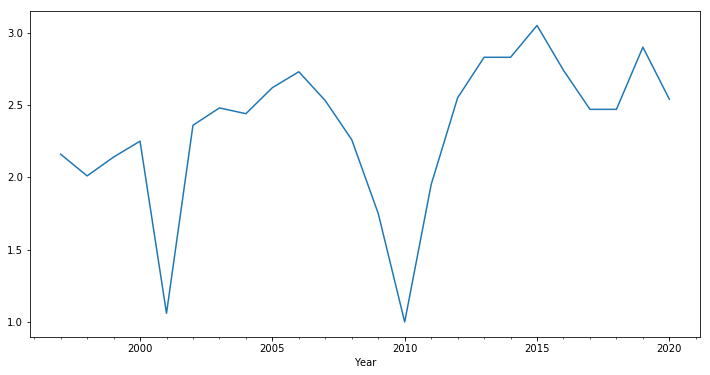

In [104]:
#Differencing data due to non stationarity - 1st difference
df['d1'] = diff(df['AgeingIndex'],k_diff=1)
df['d1'].plot(figsize=(12,6));

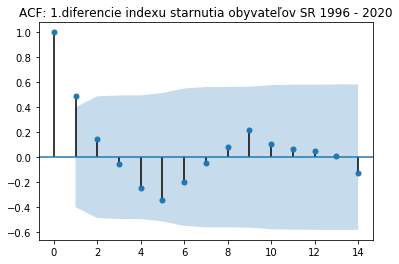

In [105]:
#ACF plot for 1st difference
title='ACF: 1.diferencie indexu starnutia obyvateľov SR 1996 - 2020'
lags=15
plot_acf(df['d1'].dropna(),title=title,lags=np.arange(lags));  # be sure to add .dropna() here!

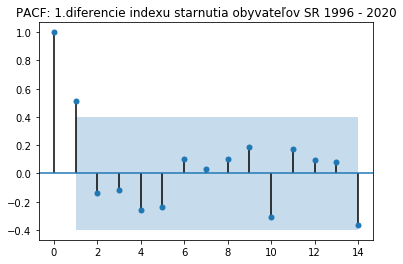

In [106]:
#PACF plot for 1st difference
title='PACF: 1.diferencie indexu starnutia obyvateľov SR 1996 - 2020'
lags=15
plot_pacf(df['d1'].dropna(),title=title,lags=np.arange(lags));  # be sure to add .dropna() here!

In [107]:
adf_test(df['d1'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -2.465762
p-value                  0.124028
# lags used              1.000000
# observations          22.000000
critical value (1%)     -3.769733
critical value (5%)     -3.005426
critical value (10%)    -2.642501
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


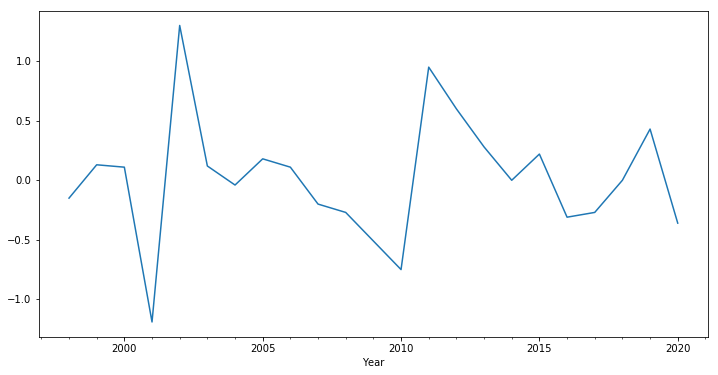

In [108]:
#Differencing data due to non stationarity - 2nd difference
df['d2'] = diff(df['AgeingIndex'],k_diff=2)
df['d2'].plot(figsize=(12,6));

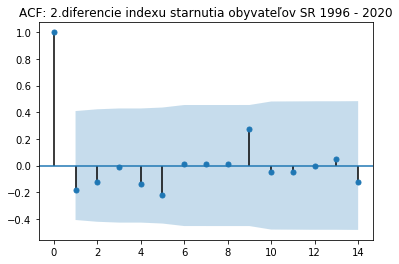

In [109]:
#ACF plot for 2nd difference
title='ACF: 2.diferencie indexu starnutia obyvateľov SR 1996 - 2020'
lags=15
plot_acf(df['d2'].dropna(),title=title,lags=np.arange(lags));  # be sure to add .dropna() here!

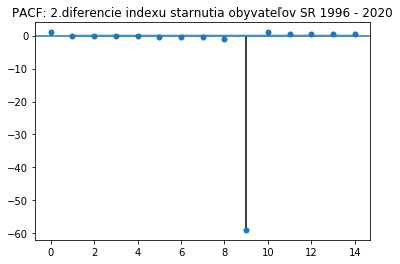

In [110]:
#PACF plot for 2nd difference
title='PACF: 2.diferencie indexu starnutia obyvateľov SR 1996 - 2020'
lags=15
plot_pacf(df['d2'].dropna(),title=title,lags=np.arange(lags));  # be sure to add .dropna() here!

In [111]:
adf_test(df['d2'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.402858e+01
p-value                 3.467479e-26
# lags used             9.000000e+00
# observations          1.300000e+01
critical value (1%)    -4.068854e+00
critical value (5%)    -3.127149e+00
critical value (10%)   -2.701730e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [112]:
#Running auto_arima function which measures many different models, do the differencing on its own

stepwise_fit = auto_arima(df['AgeingIndex'], start_p=1, start_q=1,
                          max_p=4, max_q=4,
                          seasonal=False,
                          d=2, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

print(stepwise_fit.summary())

Fit ARIMA: order=(1, 2, 1); AIC=36.533, BIC=41.075, Fit time=0.098 seconds
Fit ARIMA: order=(0, 2, 0); AIC=38.442, BIC=40.713, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=39.677, BIC=43.083, Fit time=0.021 seconds
Fit ARIMA: order=(0, 2, 1); AIC=39.308, BIC=42.714, Fit time=0.021 seconds
Fit ARIMA: order=(2, 2, 1); AIC=38.161, BIC=43.838, Fit time=0.107 seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 2); AIC=39.797, BIC=46.610, Fit time=0.221 seconds
Total fit time: 0.484 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   23
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 -14.267
Method:                       css-mle   S.D. of innovations              0.428
Date:                Mon, 20 Sep 2021   AIC                             36.533
Time:                        20:46:33   BIC               

In [113]:
# Splitting into train and test period
train = df.iloc[:20]
test = df.iloc[20:]

In [114]:
#Checking the best model after splitting

model = SARIMAX(train['AgeingIndex'],order=(1,2,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:            AgeingIndex   No. Observations:                   20
Model:               SARIMAX(1, 2, 1)   Log Likelihood                 -13.526
Date:                Mon, 20 Sep 2021   AIC                             33.053
Time:                        20:46:39   BIC                             35.724
Sample:                    01-01-1996   HQIC                            33.421
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5409      0.427      1.266      0.206      -0.297       1.378
ma.L1         -0.9982     31.053     -0.032      0.974     -61.861      59.864
sigma2         0.2379      7.307      0.033      0.974     -14.083      14.558
===================================================================================
Ljung-Box (Q):                       11.92   Jarque-Bera (JB):                 2.91
Prob(Q):                              0.81   Prob(JB):                         0.23
Heteroskedasticity (H):               0.89   Skew:                            -0.95
Prob(H) (two-sided):                  0.89   Kurtosis:                         3.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
#Predictions calculation
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(1,2,1) Test predictions')

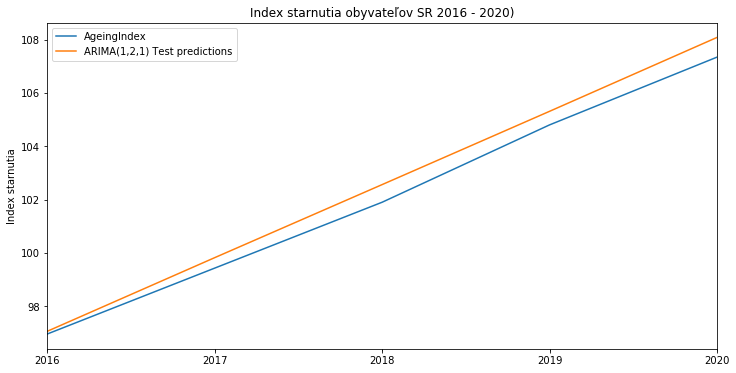

In [29]:
#Plotting predictions vs. expected data
title = 'Index starnutia obyvateľov SR 2016 - 2020)'
ylabel='Index starnutia'
xlabel='' # we don't really need a label here

ax = test['AgeingIndex'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [30]:
# predicted vs. expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['AgeingIndex'][i]}")

predicted=97.06203261, expected=96.96
predicted=99.82230344, expected=99.43
predicted=102.5615543, expected=101.9
predicted=105.3090199, expected=104.8
predicted=108.0787706, expected=107.34


In [31]:
#MSE and RMSE calculation
error = mse(test['AgeingIndex'], predictions)
print(f'ARIMA(1,2,0) MSE Error: {error:11.10}')
error = rmse(test['AgeingIndex'], predictions)
print(f'ARIMA(1,2,0) RMSE Error: {error:11.10}')

ARIMA(1,2,0) MSE Error: 0.2813700017
ARIMA(1,2,0) RMSE Error: 0.5304432126


In [32]:
#Retraining the model on full dataset
model = ARIMA(df['AgeingIndex'],order=(1,2,1))
results = model.fit()
forecast = results.predict(len(df),len(df)+9,typ='levels').rename('ARIMA(1,2,1) Forecast')

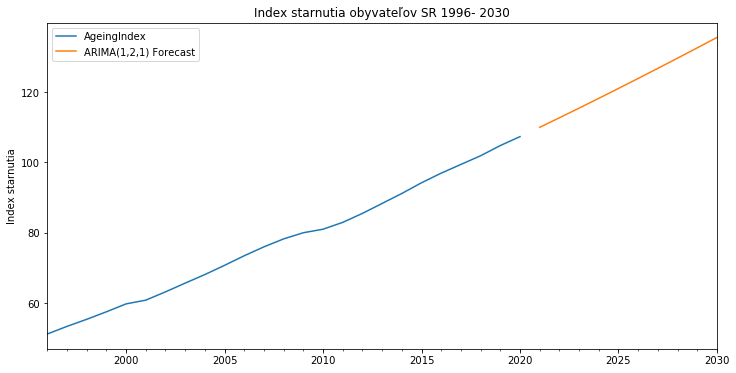

In [33]:
# Plot predictions against known values
title = 'Index starnutia obyvateľov SR 1996- 2030'
ylabel='Index starnutia'
xlabel='' # we don't really need a label here

ax = df['AgeingIndex'].plot(legend=True,figsize=(12,6),title=title)
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [34]:
forecast

2021-01-01    109.985482
2022-01-01    112.692473
2023-01-01    115.441924
2024-01-01    118.225583
2025-01-01    121.039876
2026-01-01    123.883253
2027-01-01    126.755045
2028-01-01    129.654960
2029-01-01    132.582872
2030-01-01    135.538728
Freq: AS-JAN, Name: ARIMA(1,2,1) Forecast, dtype: float64

In [ ]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults